In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
from sqlalchemy import func

session = congress_db.create_session()

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## How many committee contributions were given to Senator Elizabeth Warren?

In [3]:
warren_id = 'S2MA00170'
warren_num_contr = session.query(Contribution.id).\
                filter(Contribution.candidate_id == warren_id).\
                count()
print warren_num_contr

60


## How many committee contributions were given to Senator Ed Markey?

In [4]:
markey_id = 'H6MA07101'
markey_num_contr = session.query(Contribution.id).\
                filter(Contribution.candidate_id == markey_id).\
                count()
print markey_num_contr

243


/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


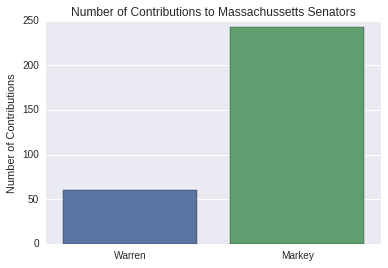

In [5]:
senators = ['Warren', 'Markey']
num_contributions = [warren_num_contr, markey_num_contr]

sns.barplot(senators, num_contributions, ci=None)
plt.title('Number of Contributions to Massachussetts Senators')
plt.ylabel('Number of Contributions')

## How much money have committees contributed to Senator Warren?

In [6]:
def total_contribution_money(senator_id):
    res = session.query(func.sum(Contribution.tx_amount)).\
                    filter(Contribution.candidate_id == senator_id).\
                    all()
    return res[0][0]

In [7]:
warren_money = total_contribution_money(warren_id)
print warren_money

162054.0


## How much money have committees contributed to Senator Markey?

In [8]:
markey_money = total_contribution_money(markey_id)
print markey_money

578710.0


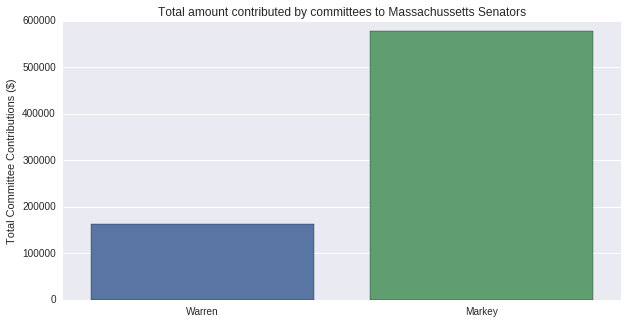

In [9]:
total_contributions = [warren_money, markey_money]

plt.figure(figsize=(10, 5))
sns.barplot(senators, total_contributions)
plt.ylabel('Total Committee Contributions ($)')
plt.title('Total amount contributed by committees to Massachussetts Senators')

## Which committees have contributed to Senator Warren?

In [10]:
def committee_total_contributions(senator_id):
    return session.query(func.sum(Contribution.tx_amount).label('total_cont'), Committee.name).\
                filter(Contribution.candidate_id == senator_id).\
                join(Committee).\
                group_by(Contribution.committee_id).\
                order_by('total_cont desc').\
                all()

In [20]:
def plot_interest_groups(cand_id, name=None):
    contr = committee_total_contributions(cand_id)
    amounts, committees = zip(*contr)
    
    plt.figure(figsize=(10, 7))
    sns.barplot(amounts[:5], committees[:5], ci=None)
    plt.xlabel('Contribution ($)')
    
    if name:
        plt.title('Top contributors to ' + name)

/home/isaac/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/compiler.py:575: SAWarning: Can't resolve label reference 'total_cont desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


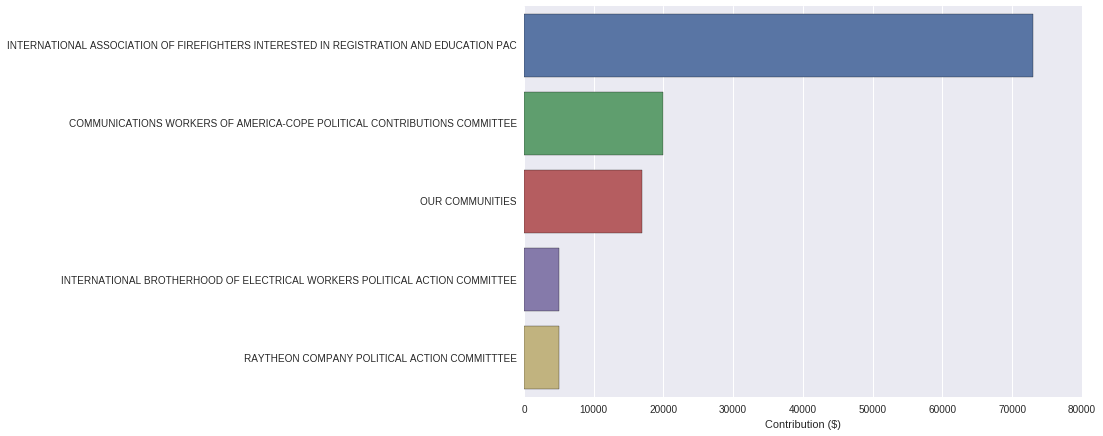

In [12]:
plot_interest_groups(warren_id)

## Which committees have contributed to Senator Markey

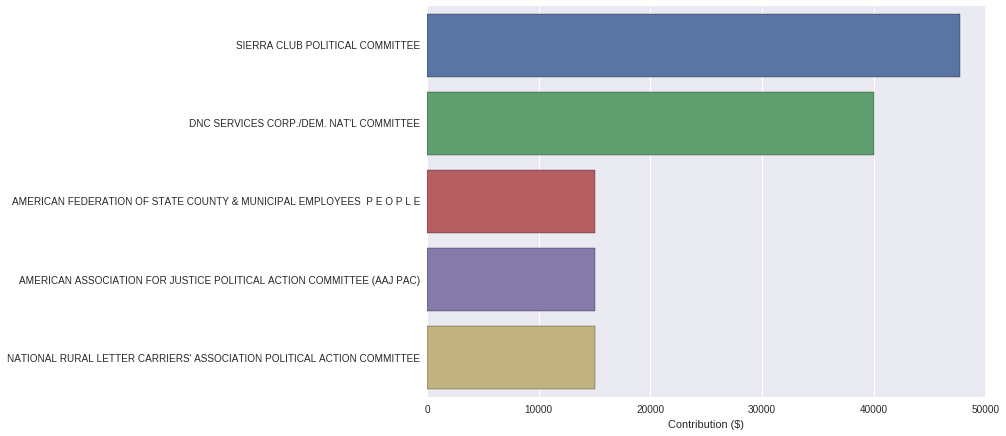

In [16]:
plot_interest_groups(markey_id)

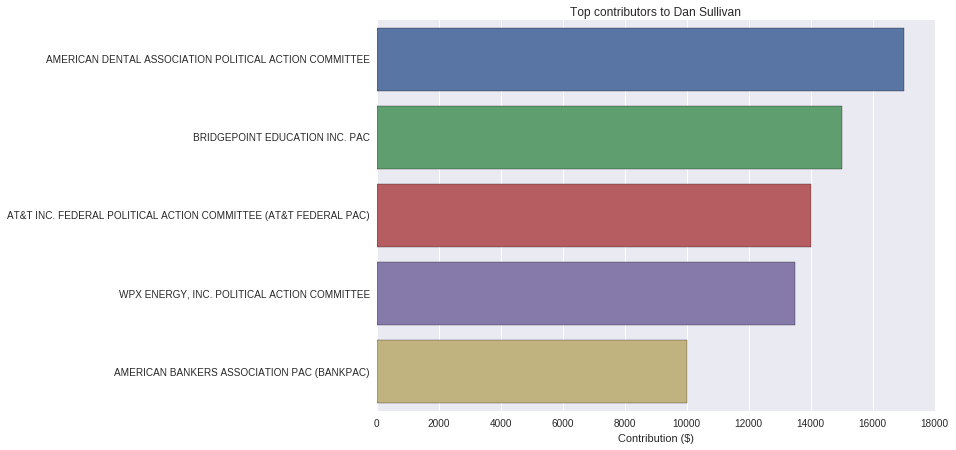

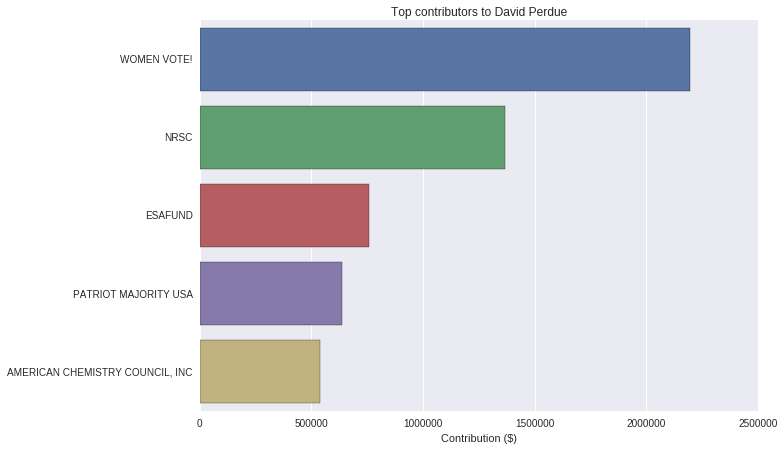

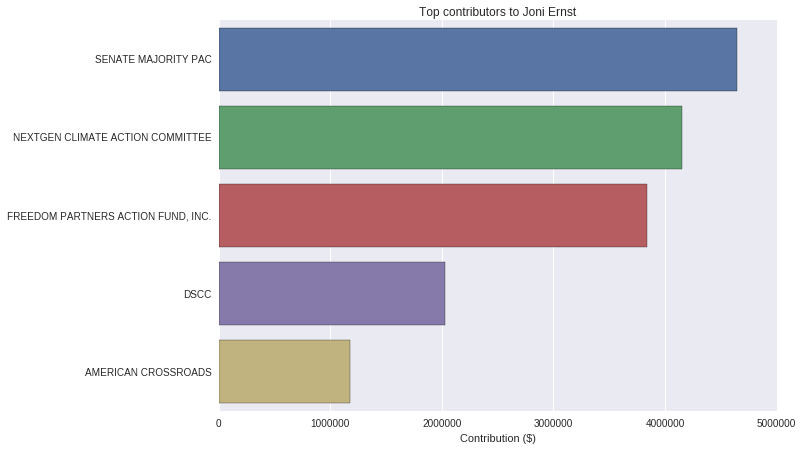

In [21]:
sullivan_id = 'S4AK00214'
perdue_id = 'S4GA11285'
ernst_id = 'S4IA00129'

plot_interest_groups(gardner_id, name='Dan Sullivan')
plot_interest_groups(perdue_id, name='David Perdue')
plot_interest_groups(ernst_id, name='Joni Ernst')